Experiments

Experiment 1 - Baseline Metrics 

Logistic Regression 

Records classified as Delayed or Cancelled:
      Passenger ID First Name  Last Name  Gender  Age    Nationality  \
22751       u5Ep8Z     Dehlia     Yellop  Female   51          China   
97068       ItpXk3       Peri   Frankema  Female   24          China   
94621       W53eW4     Rebeka     Klambt  Female   87          China   
80076       1q6aoj     Marcos  De Mitris    Male    3  United States   
23489       QRyPVR    Lurette      Trent  Female   37          Japan   
...            ...        ...        ...     ...  ...            ...   
64844       vyoEAu   Griswold  Rittmeyer    Male   56         France   
10284       K5aPaB     Reggis      Dales    Male   57      Indonesia   
53601       eF7TWd     Randal       Ales    Male   24         Sweden   
93787       8LOuDW  Bette-ann      Emmot  Female   85          China   
70940       X32TL3       Roze    Fearney  Female   66          China   

                               Airport Name Airport Country Code  \
22751  Ástor Piazzola I

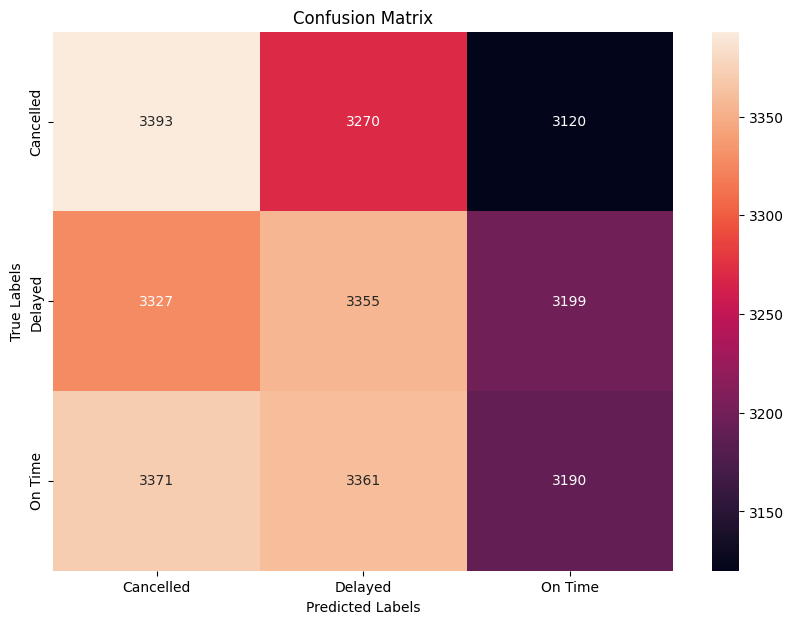

Accuracy: 0.33590211586561214
Classification Report:
               precision    recall  f1-score   support

   Cancelled       0.34      0.35      0.34      9783
     Delayed       0.34      0.34      0.34      9881
     On Time       0.34      0.32      0.33      9922

    accuracy                           0.34     29586
   macro avg       0.34      0.34      0.34     29586
weighted avg       0.34      0.34      0.34     29586



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Load dataset
data = pd.read_csv('Airline.csv')

# Remove duplicates and check for missing values
data.drop_duplicates(inplace=True)
assert data.isnull().sum().sum() == 0, "There are missing values in the dataset"

# Function to standardize date format to "M/D/YYYY"
def standardize_date(date_str):
    for fmt in ("%m/%d/%Y", "%m-%d-%Y"):
        try:
            return pd.to_datetime(date_str, format=fmt).strftime("%m/%d/%Y")
        except ValueError:
            continue
    raise ValueError(f"Date {date_str} is not in an expected format.")

# Apply date standardization
data['Departure Date'] = data['Departure Date'].apply(standardize_date)

# Convert 'Departure Date' to datetime and extract new features
data['Departure Date'] = pd.to_datetime(data['Departure Date'])
data['Month'] = data['Departure Date'].dt.month
data['Day of Week'] = data['Departure Date'].dt.dayofweek

# Fill missing values for categorical data
imputer = SimpleImputer(strategy='most_frequent')
data['Pilot Name'] = imputer.fit_transform(data[['Pilot Name']]).ravel()
data['Arrival Airport'] = imputer.fit_transform(data[['Arrival Airport']]).ravel()

# Define categorical and numeric features
categorical_features = ['Gender', 'Nationality', 'Airport Name', 'Airport Country Code', 
                        'Country Name', 'Airport Continent', 'Continents', 'Arrival Airport', 'Pilot Name', 'Month', 'Day of Week']
numeric_features = ['Age']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Pipeline setup
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Define the target and predictors
X = data.drop('Flight Status', axis=1)
y = data['Flight Status']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate the model
predictions = pipeline.predict(X_test)

# Create a DataFrame from the test set
test_set_with_predictions = X_test.copy()
test_set_with_predictions['Actual Status'] = y_test
test_set_with_predictions['Predicted Status'] = predictions

# Filter and print records classified as 'Delayed' or 'Cancelled'
classified_records = test_set_with_predictions[
    (test_set_with_predictions['Predicted Status'] == 'Delayed') |
    (test_set_with_predictions['Predicted Status'] == 'Cancelled')
]
print("Records classified as Delayed or Cancelled:")
print(classified_records)

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, predictions, labels=['Cancelled', 'Delayed', 'On Time'])
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Cancelled', 'Delayed', 'On Time'], yticklabels=['Cancelled', 'Delayed', 'On Time'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))


Random Forest Model 

Records classified as Delayed or Cancelled:
      Passenger ID First Name   Last Name  Gender  Age    Nationality  \
22751       u5Ep8Z     Dehlia      Yellop  Female   51          China   
97068       ItpXk3       Peri    Frankema  Female   24          China   
74336       WChFjr      Mikey  Brokenshaw    Male   28     Kazakhstan   
96178       tSsveq     Munroe    Stodhart    Male   76          Japan   
80076       1q6aoj     Marcos   De Mitris    Male    3  United States   
...            ...        ...         ...     ...  ...            ...   
58244       vBPDij    Isidore   Lengthorn    Male   48           Cuba   
36367       bTGx62      Nappy       Bille    Male   14          China   
10284       K5aPaB     Reggis       Dales    Male   57      Indonesia   
93787       8LOuDW  Bette-ann       Emmot  Female   85          China   
70940       X32TL3       Roze     Fearney  Female   66          China   

                                Airport Name Airport Country Code  \
22751   Ás

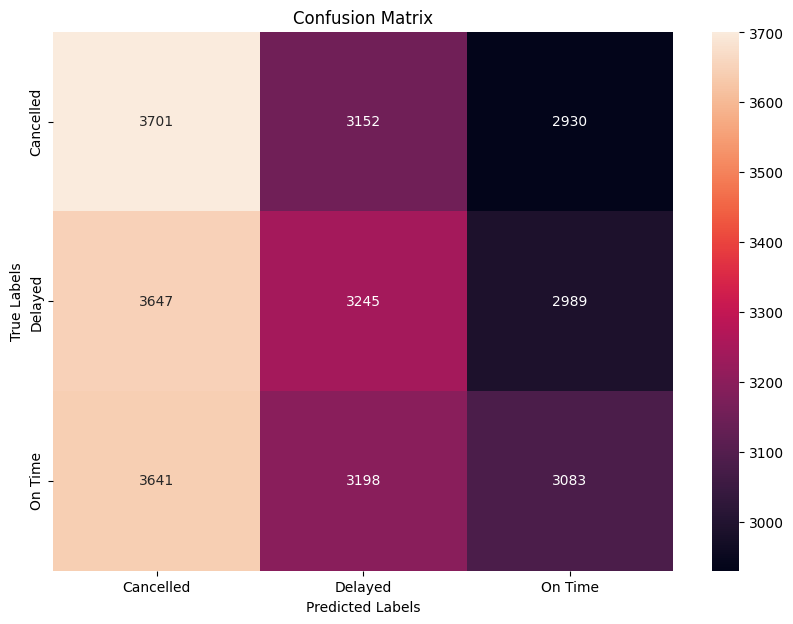

Random Forest Accuracy: 0.33897789495031433
Random Forest Classification Report:
               precision    recall  f1-score   support

   Cancelled       0.34      0.38      0.36      9783
     Delayed       0.34      0.33      0.33      9881
     On Time       0.34      0.31      0.33      9922

    accuracy                           0.34     29586
   macro avg       0.34      0.34      0.34     29586
weighted avg       0.34      0.34      0.34     29586



In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('Airline.csv')

# Remove duplicates and check for missing values
data.drop_duplicates(inplace=True)
assert data.isnull().sum().sum() == 0, "There are missing values in the dataset"

# Function to standardize date format to "M/D/YYYY"
def standardize_date(date_str):
    for fmt in ("%m/%d/%Y", "%m-%d-%Y"):
        try:
            return pd.to_datetime(date_str, format=fmt).strftime("%m/%d/%Y")
        except ValueError:
            continue
    raise ValueError(f"Date {date_str} is not in an expected format.")

# Apply date standardization
data['Departure Date'] = data['Departure Date'].apply(standardize_date)

# Convert 'Departure Date' to datetime and extract new features
data['Departure Date'] = pd.to_datetime(data['Departure Date'])
data['Month'] = data['Departure Date'].dt.month
data['Day of Week'] = data['Departure Date'].dt.dayofweek

# Fill missing values for categorical data
imputer = SimpleImputer(strategy='most_frequent')
data['Pilot Name'] = imputer.fit_transform(data[['Pilot Name']]).ravel()
data['Arrival Airport'] = imputer.fit_transform(data[['Arrival Airport']]).ravel()

# Define categorical and numeric features
categorical_features = ['Gender', 'Nationality', 'Airport Name', 'Airport Country Code', 
                        'Country Name', 'Airport Continent', 'Continents', 'Arrival Airport', 'Pilot Name', 'Month', 'Day of Week']
numeric_features = ['Age']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Pipeline setup
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the target and predictors
X = data.drop('Flight Status', axis=1)
y = data['Flight Status']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate the model
predictions = pipeline.predict(X_test)

# Create a DataFrame from the test set
test_set_with_predictions = X_test.copy()
test_set_with_predictions['Actual Status'] = y_test
test_set_with_predictions['Predicted Status'] = predictions

# Filter and print records classified as 'Delayed' or 'Cancelled'
classified_records = test_set_with_predictions[
    (test_set_with_predictions['Predicted Status'] == 'Delayed') |
    (test_set_with_predictions['Predicted Status'] == 'Cancelled')
]
print("Records classified as Delayed or Cancelled:")
print(classified_records)

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, predictions, labels=['Cancelled', 'Delayed', 'On Time'])
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Cancelled', 'Delayed', 'On Time'], yticklabels=['Cancelled', 'Delayed', 'On Time'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print accuracy and classification report
print("Random Forest Accuracy:", accuracy_score(y_test, predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, predictions))


XGBoost Model Gradient Boost 

Records classified as Delayed or Cancelled:
      Passenger ID First Name   Last Name  Gender  Age Nationality  \
22751       u5Ep8Z     Dehlia      Yellop  Female   51       China   
97068       ItpXk3       Peri    Frankema  Female   24       China   
74336       WChFjr      Mikey  Brokenshaw    Male   28  Kazakhstan   
94621       W53eW4     Rebeka      Klambt  Female   87       China   
96178       tSsveq     Munroe    Stodhart    Male   76       Japan   
...            ...        ...         ...     ...  ...         ...   
64844       vyoEAu   Griswold   Rittmeyer    Male   56      France   
10284       K5aPaB     Reggis       Dales    Male   57   Indonesia   
53601       eF7TWd     Randal        Ales    Male   24      Sweden   
63286       SKcyUk     Vivien       Asmus  Female   82     Armenia   
70940       X32TL3       Roze     Fearney  Female   66       China   

                                         Airport Name Airport Country Code  \
22751            Ástor Piazzola Inter

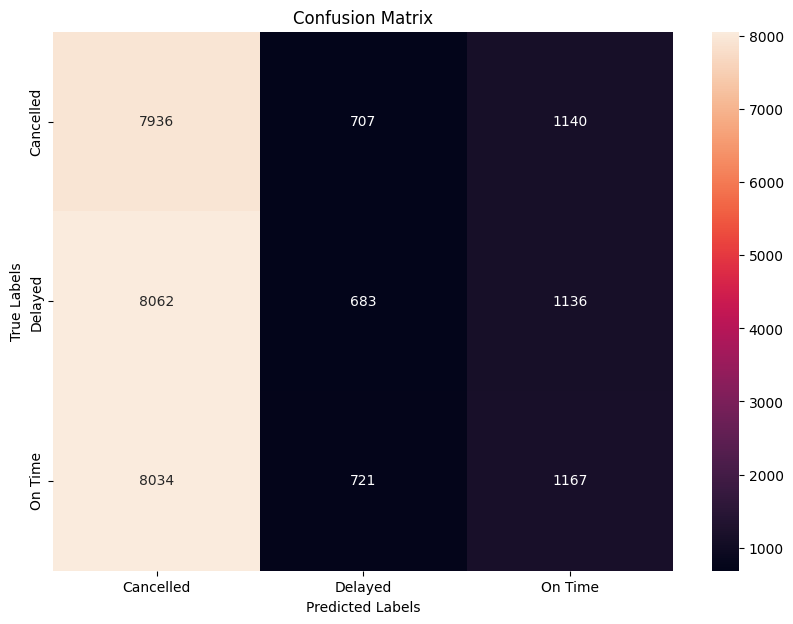

XGBoost Accuracy: 0.33076455080105455
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.81      0.47      9783
           1       0.32      0.07      0.11      9881
           2       0.34      0.12      0.17      9922

    accuracy                           0.33     29586
   macro avg       0.33      0.33      0.25     29586
weighted avg       0.33      0.33      0.25     29586



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('Airline.csv')

# Remove duplicates and check for missing values
data.drop_duplicates(inplace=True)
assert data.isnull().sum().sum() == 0, "There are missing values in the dataset"

# Function to standardize date format to "M/D/YYYY"
def standardize_date(date_str):
    for fmt in ("%m/%d/%Y", "%m-%d-%Y"):
        try:
            return pd.to_datetime(date_str, format=fmt).strftime("%m/%d/%Y")
        except ValueError:
            continue
    raise ValueError(f"Date {date_str} is not in an expected format.")

# Apply date standardization
data['Departure Date'] = data['Departure Date'].apply(standardize_date)

# Convert 'Departure Date' to datetime and extract new features
data['Departure Date'] = pd.to_datetime(data['Departure Date'])
data['Month'] = data['Departure Date'].dt.month
data['Day of Week'] = data['Departure Date'].dt.dayofweek

# Encode the 'Flight Status' target variable to numeric labels
label_encoder = LabelEncoder()
data['Flight Status'] = label_encoder.fit_transform(data['Flight Status'])

# Fill missing values for categorical data
imputer = SimpleImputer(strategy='most_frequent')
data['Pilot Name'] = imputer.fit_transform(data[['Pilot Name']]).ravel()
data['Arrival Airport'] = imputer.fit_transform(data[['Arrival Airport']]).ravel()

# Define categorical and numeric features
categorical_features = ['Gender', 'Nationality', 'Airport Name', 'Airport Country Code', 
                        'Country Name', 'Airport Continent', 'Continents', 'Arrival Airport', 'Pilot Name', 'Month', 'Day of Week']
numeric_features = ['Age']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Pipeline setup
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Define the target and predictors
X = data.drop('Flight Status', axis=1)
y = data['Flight Status']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate the model
predictions = pipeline.predict(X_test)

# Create a DataFrame from the test set
test_set_with_predictions = X_test.copy()
test_set_with_predictions['Actual Status'] = y_test
test_set_with_predictions['Predicted Status'] = predictions

# Filter and print records classified as 'Delayed' or 'Cancelled'
classified_records = test_set_with_predictions[
    (test_set_with_predictions['Predicted Status'] == 1) | 
    (test_set_with_predictions['Predicted Status'] == 0)
]
print("Records classified as Delayed or Cancelled:")
print(classified_records)

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, predictions, labels=[0, 1, 2]) 
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Cancelled', 'Delayed', 'On Time'], yticklabels=['Cancelled', 'Delayed', 'On Time'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print accuracy and classification report
print("XGBoost Accuracy:", accuracy_score(y_test, predictions))
print("XGBoost Classification Report:\n", classification_report(y_test, predictions))


Experiment 2 - Hyperparameter Tuning

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, accuracy_score

# Load dataset
df = pd.read_csv('Airline.csv')

# Ensure target variable is binary encoded
df['Flight Status'] = df['Flight Status'].map({'On Time': 1, 'Delayed': 0, 'Cancelled': 0})

# Define categorical and numeric features
categorical_features = ['Gender', 'Nationality', 'Airport Country Code', 'Country Name', 'Airport Continent', 'Continents', 'Arrival Airport']
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove target variable from numeric features
if 'Flight Status' in numeric_features:
    numeric_features.remove('Flight Status')

# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define resampling strategy
resampler = SMOTE(sampling_strategy=0.75, random_state=42)

# Define the full pipeline
pipeline = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('resampler', resampler),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators=200, learning_rate=0.1, max_depth=5, subsample=0.8, colsample_bytree=0.8, scale_pos_weight=1.5))
])

# Extract features and target variable
X = df.drop('Flight Status', axis=1)
y = df['Flight Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions with the model
y_pred_test_xgb = pipeline.predict(X_test)

# Evaluate the XGBoost model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_test_xgb, zero_division=1))

# Calculate MAE and RMSE for the test set
test_mae_xgb = mean_absolute_error(y_test, y_pred_test_xgb)
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_test_xgb))
print("XGBoost Test MAE:", test_mae_xgb)
print("XGBoost Test RMSE:", test_rmse_xgb)

# Calculate and print the overall accuracy
accuracy = accuracy_score(y_test, y_pred_test_xgb)
print("XGBoost Test Accuracy:", accuracy)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.63      0.65     13101
           1       0.34      0.37      0.35      6623

    accuracy                           0.54     19724
   macro avg       0.50      0.50      0.50     19724
weighted avg       0.56      0.54      0.55     19724

XGBoost Test MAE: 0.4558912999391604
XGBoost Test RMSE: 0.6751972303995036
XGBoost Test Accuracy: 0.5441087000608396


Experiment 3

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
df = pd.read_csv('Airline.csv')

# Ensure target variable is binary encoded
df['Flight Status'] = df['Flight Status'].map({'On Time': 1, 'Delayed': 0, 'Cancelled': 0})

# Define categorical and numeric features
categorical_features = ['Gender', 'Nationality', 'Airport Country Code', 'Country Name', 'Airport Continent', 'Continents', 'Arrival Airport']
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove target variable from numeric features
if 'Flight Status' in numeric_features:
    numeric_features.remove('Flight Status')

# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define resampling strategy
resampler = SMOTE(random_state=42)

# Extract features and target variable
X = df.drop('Flight Status', axis=1)
y = df['Flight Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing and resampling
pipeline = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('resampler', resampler)
])

X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Convert the resampled training data to dense format
X_train_resampled = X_train_resampled.toarray()
X_test_preprocessed = X_test_preprocessed.toarray()

# Split the resampled training data into training and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train_final.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_final, y_train_final, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

# Make predictions
y_pred_test = model.predict(X_test_preprocessed).ravel()
y_pred_test_classes = (y_pred_test > 0.5).astype(int)

# Evaluate the model
print("Deep Learning Model Classification Report:")
print(classification_report(y_test, y_pred_test_classes, zero_division=1))

# Calculate MAE and RMSE for the test set
test_mae_nn = mean_absolute_error(y_test, y_pred_test_classes)
test_rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_test_classes))
print("Deep Learning Model Test MAE:", test_mae_nn)
print("Deep Learning Model Test RMSE:", test_rmse_nn)

# Calculate and print the overall accuracy
accuracy_nn = accuracy_score(y_test, y_pred_test_classes)
print("Deep Learning Model Test Accuracy:", accuracy_nn)


Epoch 1/100
2634/2634 [==============================] - 7s 3ms/step - loss: 0.6924 - accuracy: 0.5173 - val_loss: 0.6875 - val_accuracy: 0.5493
Epoch 2/100
2634/2634 [==============================] - 6s 2ms/step - loss: 0.6643 - accuracy: 0.6002 - val_loss: 0.6602 - val_accuracy: 0.6061
Epoch 3/100
2634/2634 [==============================] - 6s 2ms/step - loss: 0.5791 - accuracy: 0.7015 - val_loss: 0.6281 - val_accuracy: 0.6574
Epoch 4/100
2634/2634 [==============================] - 6s 2ms/step - loss: 0.4769 - accuracy: 0.7792 - val_loss: 0.6275 - val_accuracy: 0.6872
Epoch 5/100
2634/2634 [==============================] - 6s 2ms/step - loss: 0.3912 - accuracy: 0.8289 - val_loss: 0.6149 - val_accuracy: 0.7161
Epoch 6/100
2634/2634 [==============================] - 6s 2ms/step - loss: 0.3245 - accuracy: 0.8639 - val_loss: 0.6525 - val_accuracy: 0.7251
Epoch 7/100
2634/2634 [==============================] - 6s 2ms/step - loss: 0.2761 - accuracy: 0.8885 - val_loss: 0.6697 - val_ac

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import joblib

# Load the dataset
df = pd.read_csv('Airline.csv')

# Ensure consistent date format for 'Departure Date'
df['Departure Date'] = pd.to_datetime(df['Departure Date'], errors='coerce')

# Extract 'Month' and 'Day of Week' from 'Departure Date'
df['Month'] = df['Departure Date'].dt.month
df['Day of Week'] = df['Departure Date'].dt.dayofweek

# Drop less informative columns
df = df.drop(['Passenger ID', 'First Name', 'Last Name', 'Pilot Name', 'Departure Date'], axis=1)

# Drop rows with NaN values
df = df.dropna()

# Apply one-hot encoding to the remaining categorical columns, including 'Flight Status'
categorical_columns = ['Gender', 'Nationality', 'Airport Name', 'Airport Country Code', 'Country Name', 'Airport Continent', 'Continents', 'Arrival Airport', 'Flight Status']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Extract features and target variable
X = df_encoded.drop(['Flight Status_On Time', 'Flight Status_Delayed', 'Flight Status_Cancelled'], axis=1)
y = df_encoded['Flight Status_On Time']  # Assuming 'On Time' as the target class

# Feature selection
selector = SelectKBest(f_classif, k=50)  # Adjust k based on the dataset size and characteristics
X_selected = selector.fit_transform(X, y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the BalancedRandomForest model
brf = BalancedRandomForestClassifier(random_state=42, n_estimators=100)
brf.fit(X_train, y_train)

# Make predictions with BalancedRandomForest model
y_pred_test = brf.predict(X_test)

# Evaluate the BalancedRandomForest model
print("BalancedRandomForest Model Classification Report:")
print(classification_report(y_test, y_pred_test))

# Calculate and print the overall accuracy
accuracy = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)
print("BalancedRandomForest Test Accuracy:", accuracy)
print("BalancedRandomForest Test F1 Score:", f1)
print("BalancedRandomForest Test ROC AUC Score:", roc_auc)

# Save the BalancedRandomForest model
joblib.dump(brf, 'best_balanced_random_forest_model.pkl')


/Users/adamlaframboise/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/adamlaframboise/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/adamlaframboise/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warni

BalancedRandomForest Model Classification Report:
              precision    recall  f1-score   support

       False       0.68      1.00      0.81      8050
        True       0.71      0.01      0.02      3882

    accuracy                           0.68     11932
   macro avg       0.69      0.50      0.41     11932
weighted avg       0.69      0.68      0.55     11932

BalancedRandomForest Test Accuracy: 0.6766677841099564
BalancedRandomForest Test F1 Score: 0.02081218274111675
BalancedRandomForest Test ROC AUC Score: 0.504224882480376


['best_balanced_random_forest_model.pkl']

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib

# Load the dataset
df = pd.read_csv('Airline.csv')

# Ensure consistent date format for 'Departure Date'
df['Departure Date'] = pd.to_datetime(df['Departure Date'], errors='coerce')

# Extract 'Month' and 'Day of Week' from 'Departure Date'
df['Month'] = df['Departure Date'].dt.month
df['Day of Week'] = df['Departure Date'].dt.dayofweek

# Drop less informative columns
df = df.drop(['Passenger ID', 'First Name', 'Last Name', 'Pilot Name', 'Departure Date'], axis=1)

# Drop rows with NaN values
df = df.dropna()

# Apply one-hot encoding to the remaining categorical columns, including 'Flight Status'
categorical_columns = ['Gender', 'Nationality', 'Airport Name', 'Airport Country Code', 'Country Name', 'Airport Continent', 'Continents', 'Arrival Airport', 'Flight Status']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Extract features and target variable
X = df_encoded.drop(['Flight Status_On Time', 'Flight Status_Delayed', 'Flight Status_Cancelled'], axis=1)
y = df_encoded['Flight Status_On Time']  # Assuming 'On Time' as the target class

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train_smote, y_train_smote)

# Make predictions with the model
y_pred_test = knn_model.predict(X_test)

# Evaluate the model
print("K-Nearest Neighbors Model Classification Report:")
print(classification_report(y_test, y_pred_test))

# Calculate and print the overall accuracy
accuracy = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)
print("K-Nearest Neighbors Test Accuracy:", accuracy)
print("K-Nearest Neighbors Test F1 Score:", f1)
print("K-Nearest Neighbors Test ROC AUC Score:", roc_auc)

# Save the model
joblib.dump(knn_model, 'best_knn_model.pkl')


K-Nearest Neighbors Model Classification Report:
              precision    recall  f1-score   support

       False       0.67      0.53      0.59      8050
        True       0.32      0.46      0.38      3882

    accuracy                           0.51     11932
   macro avg       0.50      0.50      0.49     11932
weighted avg       0.56      0.51      0.52     11932

K-Nearest Neighbors Test Accuracy: 0.5091350988937311
K-Nearest Neighbors Test F1 Score: 0.3775108938250611
K-Nearest Neighbors Test ROC AUC Score: 0.4957667015465551


['best_knn_model.pkl']